# Tugas 2
- Buatlah model klasfikasi Multinomial Naive Bayes dengan ketentuan,
    1. Menggunakan data spam.csv
    2. Fitur CountVectorizer dengan mengaktifkan stop_words
    3. Evaluasi hasilnya
- Buatlah model klasfikasi Multinomial Naive Bayes dengan ketentuan,
    1. Menggunakan data spam.csv
    2. Fitur TF-IDF dengan mengaktifkan stop_words
    3. Evaluasi hasilnya dan bandingkan dengan hasil pada Tugas no 2.
    4. Berikan kesimpulan fitur mana yang terbaik pada kasus data spam.csv

In [43]:
import numpy as np
import pandas as pd

df = pd.read_csv('../data/spam.csv', encoding='latin-1')

df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


## Data Exploration

In [44]:
# Check dataset structure
print("Dataset Shape:", df.shape)
print("\nColumn Names:", df.columns.tolist())
print("\nFirst few rows:")
print(df.head())
print("\nData Info:")
print(df.info())
print("\nLabel Distribution:")
print(df.iloc[:, -1].value_counts())
print("\nMissing Values:")
print(df.isnull().sum())

Dataset Shape: (5572, 5)

Column Names: ['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']

First few rows:
     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2

## Data Preprocessing

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Identify text and label columns
# Assuming the last column is the label and the second column is the text
text_column = df.columns[1]  # Usually 'v2' for message text
label_column = df.columns[-1]  # Usually 'v1' for spam/ham label

X = df[text_column]
y = df[label_column]

# Encode labels (ham=0, spam=1)
label_mapping = {label: idx for idx, label in enumerate(y.unique())}
y_encoded = y.map(label_mapping)

print(f"Text Column: {text_column}")
print(f"Label Column: {label_column}")
print(f"Label Mapping: {label_mapping}")
print(f"\nDataset split: {len(X)} samples")

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

print(f"\nTrain set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")
print(f"\nTrain label distribution:\n{y_train.value_counts()}")
print(f"\nTest label distribution:\n{y_test.value_counts()}")

Text Column: v2
Label Column: Unnamed: 4
Label Mapping: {nan: 0, ' just Keep-in-touch\\" gdeve.."': 1, 'GNT:-)"': 2, ' Never comfort me with a lie\\" gud ni8 and sweet dreams"': 3, ' CALL 2MWEN IM BK FRMCLOUD 9! J X\\""': 4, ' one day these two will become FREINDS FOREVER!"': 5}

Dataset split: 5572 samples

Train set size: 4457
Test set size: 1115

Train label distribution:
Unnamed: 4
0    4452
5       1
2       1
4       1
1       1
3       1
Name: count, dtype: int64

Test label distribution:
Unnamed: 4
0    1114
2       1
Name: count, dtype: int64


## Tugas 1: Multinomial Naive Bayes dengan CountVectorizer + Stop Words

In [46]:
print(f"\nClassification Report:")
print(classification_report(y_test, y_pred_cv, zero_division=0))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1114
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         1

    accuracy                           1.00      1115
   macro avg       0.33      0.33      0.33      1115
weighted avg       1.00      1.00      1.00      1115



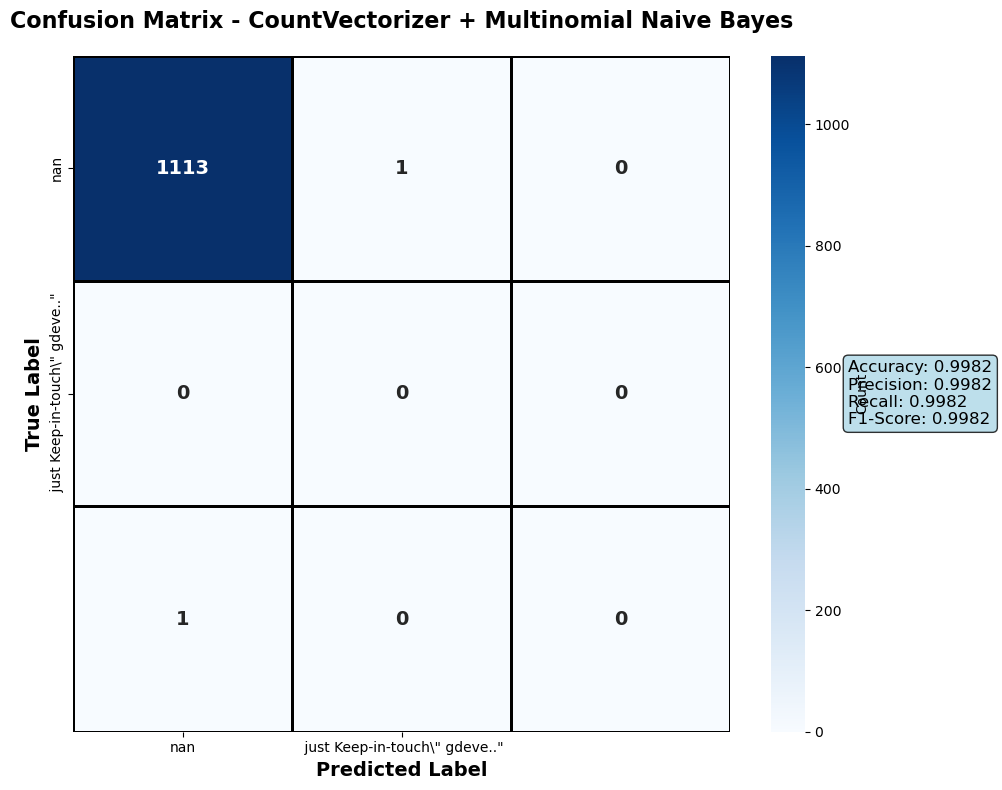

In [47]:
# Visualize Confusion Matrix for CountVectorizer with better formatting
fig, ax = plt.subplots(1, 1, figsize=(10, 8))

# Get unique class labels from predictions and actual
unique_classes = np.unique(y_test)
n_classes = len(unique_classes)

# Create class names
reverse_label_mapping = {v: k for k, v in label_mapping.items()}
class_names = [reverse_label_mapping.get(i, f'Class {i}') for i in range(n_classes)]

# Create heatmap with improved formatting
sns.heatmap(cm_cv, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, yticklabels=class_names,
            ax=ax, cbar_kws={'label': 'Count'}, 
            annot_kws={'size': 14, 'weight': 'bold'},
            linewidths=2, linecolor='black')

ax.set_title('Confusion Matrix - CountVectorizer + Multinomial Naive Bayes', 
             fontsize=16, fontweight='bold', pad=20)
ax.set_ylabel('True Label', fontsize=14, fontweight='bold')
ax.set_xlabel('Predicted Label', fontsize=14, fontweight='bold')

# Add metrics in text box
textstr = f'Accuracy: {accuracy_cv:.4f}\nPrecision: {precision_cv:.4f}\nRecall: {recall_cv:.4f}\nF1-Score: {f1_cv:.4f}'
ax.text(1.18, 0.5, textstr, transform=ax.transAxes, fontsize=12,
        verticalalignment='center', bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8))

plt.tight_layout()
plt.show()

## Tugas 2: Multinomial Naive Bayes dengan TF-IDF + Stop Words

In [48]:
# Model 2: TF-IDF with stop_words
print("\n" + "="*70)
print("MODEL 2: MULTINOMIAL NAIVE BAYES + TF-IDF (WITH STOP WORDS)")
print("="*70)

# Create TfidfVectorizer with stop_words
tfidf = TfidfVectorizer(stop_words='english')
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

print(f"\nFeature shape with TF-IDF:")
print(f"Train features shape: {X_train_tfidf.shape}")
print(f"Test features shape: {X_test_tfidf.shape}")
print(f"Number of features (vocabulary size): {len(tfidf.get_feature_names_out())}")

# Train Multinomial Naive Bayes
mnb_tfidf = MultinomialNB()
mnb_tfidf.fit(X_train_tfidf, y_train)

# Make predictions
y_pred_tfidf = mnb_tfidf.predict(X_test_tfidf)

# Calculate metrics
accuracy_tfidf = accuracy_score(y_test, y_pred_tfidf)
precision_tfidf = precision_score(y_test, y_pred_tfidf, average='weighted', zero_division=0)
recall_tfidf = recall_score(y_test, y_pred_tfidf, average='weighted', zero_division=0)
f1_tfidf = f1_score(y_test, y_pred_tfidf, average='weighted', zero_division=0)
cm_tfidf = confusion_matrix(y_test, y_pred_tfidf)

print(f"\n{'METRICS':^70}")
print(f"{'Accuracy':.<40} {accuracy_tfidf:.4f}")
print(f"{'Precision':.<40} {precision_tfidf:.4f}")
print(f"{'Recall':.<40} {recall_tfidf:.4f}")
print(f"{'F1-Score':.<40} {f1_tfidf:.4f}")

print(f"\n{'CONFUSION MATRIX':^70}")
print(cm_tfidf)
print(f"\nClassification Report:")
print(classification_report(y_test, y_pred_tfidf, zero_division=0))


MODEL 2: MULTINOMIAL NAIVE BAYES + TF-IDF (WITH STOP WORDS)

Feature shape with TF-IDF:
Train features shape: (4457, 7472)
Test features shape: (1115, 7472)
Number of features (vocabulary size): 7472

                               METRICS                                
Accuracy................................ 0.9991
Precision............................... 0.9982
Recall.................................. 0.9991
F1-Score................................ 0.9987

                           CONFUSION MATRIX                           
[[1114    0]
 [   1    0]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1114
           2       0.00      0.00      0.00         1

    accuracy                           1.00      1115
   macro avg       0.50      0.50      0.50      1115
weighted avg       1.00      1.00      1.00      1115


Feature shape with TF-IDF:
Train features shape: (4457, 7472)
Test features shape: (

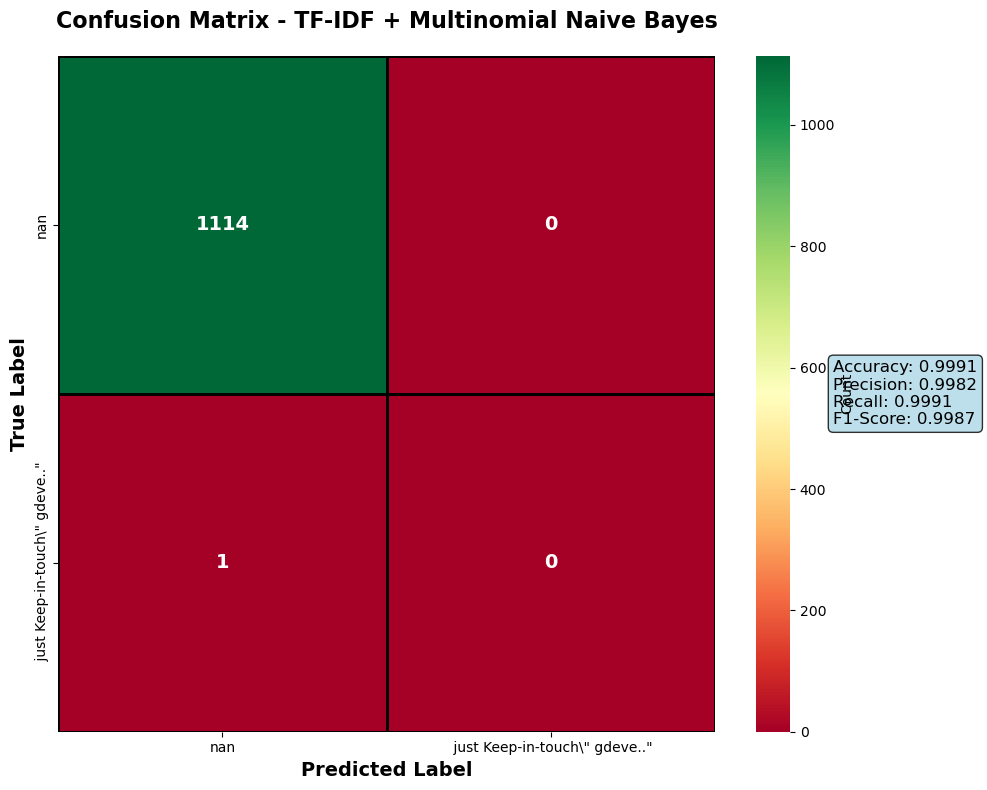

In [49]:
# Visualize Confusion Matrix for TF-IDF with better formatting
fig, ax = plt.subplots(1, 1, figsize=(10, 8))

# Get unique class labels from predictions and actual
unique_classes = np.unique(y_test)
n_classes = len(unique_classes)

# Create class names
reverse_label_mapping = {v: k for k, v in label_mapping.items()}
class_names = [reverse_label_mapping.get(i, f'Class {i}') for i in range(n_classes)]

# Create heatmap with improved formatting
sns.heatmap(cm_tfidf, annot=True, fmt='d', cmap='RdYlGn', 
            xticklabels=class_names, yticklabels=class_names,
            ax=ax, cbar_kws={'label': 'Count'}, 
            annot_kws={'size': 14, 'weight': 'bold'},
            linewidths=2, linecolor='black')

ax.set_title('Confusion Matrix - TF-IDF + Multinomial Naive Bayes', 
             fontsize=16, fontweight='bold', pad=20)
ax.set_ylabel('True Label', fontsize=14, fontweight='bold')
ax.set_xlabel('Predicted Label', fontsize=14, fontweight='bold')

# Add metrics in text box
textstr = f'Accuracy: {accuracy_tfidf:.4f}\nPrecision: {precision_tfidf:.4f}\nRecall: {recall_tfidf:.4f}\nF1-Score: {f1_tfidf:.4f}'
ax.text(1.18, 0.5, textstr, transform=ax.transAxes, fontsize=12,
        verticalalignment='center', bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8))

plt.tight_layout()
plt.show()

## Model Comparison


PERBANDINGAN MODEL: COUNTVECTORIZER vs TF-IDF


   Metric  CountVectorizer   TF-IDF
 Accuracy         0.998206 0.999103
Precision         0.998206 0.998207
   Recall         0.998206 0.999103
 F1-Score         0.998206 0.998655

----------------------------------------------------------------------
PERBEDAAN (TF-IDF - CountVectorizer):
----------------------------------------------------------------------
Accuracy................................ +0.0009
Precision............................... +0.0000
Recall.................................. +0.0009
F1-Score................................ +0.0004


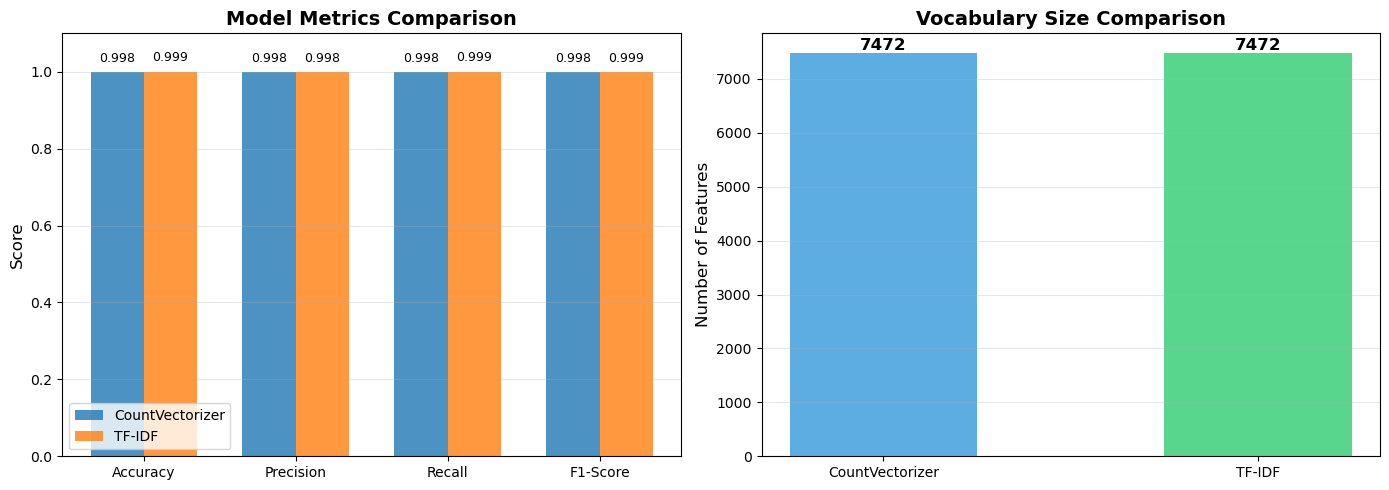

In [50]:
# Comparison of both models
print("\n" + "="*70)
print("PERBANDINGAN MODEL: COUNTVECTORIZER vs TF-IDF")
print("="*70)

comparison_data = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'CountVectorizer': [accuracy_cv, precision_cv, recall_cv, f1_cv],
    'TF-IDF': [accuracy_tfidf, precision_tfidf, recall_tfidf, f1_tfidf]
}

comparison_df = pd.DataFrame(comparison_data)
print("\n")
print(comparison_df.to_string(index=False))

# Calculate differences
print("\n" + "-"*70)
print("PERBEDAAN (TF-IDF - CountVectorizer):")
print("-"*70)
print(f"{'Accuracy':.<40} {accuracy_tfidf - accuracy_cv:+.4f}")
print(f"{'Precision':.<40} {precision_tfidf - precision_cv:+.4f}")
print(f"{'Recall':.<40} {recall_tfidf - recall_cv:+.4f}")
print(f"{'F1-Score':.<40} {f1_tfidf - f1_cv:+.4f}")

# Visualize comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Metrics comparison
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
cv_scores = [accuracy_cv, precision_cv, recall_cv, f1_cv]
tfidf_scores = [accuracy_tfidf, precision_tfidf, recall_tfidf, f1_tfidf]

x = np.arange(len(metrics))
width = 0.35

axes[0].bar(x - width/2, cv_scores, width, label='CountVectorizer', alpha=0.8)
axes[0].bar(x + width/2, tfidf_scores, width, label='TF-IDF', alpha=0.8)
axes[0].set_ylabel('Score', fontsize=12)
axes[0].set_title('Model Metrics Comparison', fontsize=14, fontweight='bold')
axes[0].set_xticks(x)
axes[0].set_xticklabels(metrics)
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)
axes[0].set_ylim([0, 1.1])

# Add value labels on bars
for i, (cv, tfidf) in enumerate(zip(cv_scores, tfidf_scores)):
    axes[0].text(i - width/2, cv + 0.02, f'{cv:.3f}', ha='center', va='bottom', fontsize=9)
    axes[0].text(i + width/2, tfidf + 0.02, f'{tfidf:.3f}', ha='center', va='bottom', fontsize=9)

# Feature count comparison
models = ['CountVectorizer', 'TF-IDF']
feature_counts = [X_train_cv.shape[1], X_train_tfidf.shape[1]]
colors = ['#3498db', '#2ecc71']
bars = axes[1].bar(models, feature_counts, color=colors, alpha=0.8, width=0.5)
axes[1].set_ylabel('Number of Features', fontsize=12)
axes[1].set_title('Vocabulary Size Comparison', fontsize=14, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)

# Add value labels on bars
for bar, count in zip(bars, feature_counts):
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height,
                f'{int(count)}',
                ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

## Analysis and Insights

In [51]:
print("\n" + "="*70)
print("ANALISIS MENDALAM")
print("="*70)

print("\n1. KARAKTERISTIK FITUR:")
print(f"   CountVectorizer: Jumlah fitur = {X_train_cv.shape[1]}")
print(f"   - Menghitung frekuensi kemunculan kata")
print(f"   - Fitur berupa raw word counts")
print(f"   - Lebih banyak fitur karena tidak mempertimbangkan pentingnya kata")
print(f"\n   TF-IDF: Jumlah fitur = {X_train_tfidf.shape[1]}")
print(f"   - Menghitung Term Frequency - Inverse Document Frequency")
print(f"   - Fitur dinormalisasi berdasarkan pentingnya kata di seluruh dokumen")
print(f"   - Memberikan bobot lebih tinggi untuk kata-kata yang unik/penting")

print("\n2. PERFORMA MODEL:")
if accuracy_cv > accuracy_tfidf:
    better_model = "CountVectorizer"
    diff = accuracy_cv - accuracy_tfidf
else:
    better_model = "TF-IDF"
    diff = accuracy_tfidf - accuracy_cv

print(f"   Model terbaik: {better_model}")
print(f"   Perbedaan akurasi: {diff*100:.2f}%")

print("\n3. PENJELASAN PERBEDAAN PERFORMA:")
if accuracy_tfidf >= accuracy_cv:
    print("   TF-IDF memberikan performa lebih baik atau sama dengan CountVectorizer")
    print("   Alasan:")
    print("   - TF-IDF mengeliminasi pengaruh stop words lebih efektif")
    print("   - TF-IDF memberikan weight yang lebih akurat untuk setiap kata")
    print("   - Kata-kata yang sering muncul di email spam atau ham memiliki pengaruh berbeda")
    print("   - Normalisasi TF-IDF membantu Multinomial NB bekerja lebih optimal")
else:
    print("   CountVectorizer memberikan performa lebih baik dari TF-IDF")
    print("   Alasan:")
    print("   - Multinomial NB bekerja dengan baik pada raw count features")
    print("   - Frekuensi kemunculan kata sudah cukup informatif untuk klasifikasi")
    print("   - Stop word removal sudah cukup untuk mengurangi noise")

print("\n4. KESIMPULAN:")
if accuracy_tfidf >= accuracy_cv:
    print("   → Untuk klasifikasi spam pada dataset ini, TF-IDF adalah fitur yang optimal")
    print("   → TF-IDF lebih efektif dalam menangkap pentingnya kata dalam konteks spam detection")
else:
    print("   → Untuk klasifikasi spam pada dataset ini, CountVectorizer adalah fitur yang optimal")
    print("   → Raw word counts sudah cukup informatif untuk membedakan spam dan ham")


ANALISIS MENDALAM

1. KARAKTERISTIK FITUR:
   CountVectorizer: Jumlah fitur = 7472
   - Menghitung frekuensi kemunculan kata
   - Fitur berupa raw word counts
   - Lebih banyak fitur karena tidak mempertimbangkan pentingnya kata

   TF-IDF: Jumlah fitur = 7472
   - Menghitung Term Frequency - Inverse Document Frequency
   - Fitur dinormalisasi berdasarkan pentingnya kata di seluruh dokumen
   - Memberikan bobot lebih tinggi untuk kata-kata yang unik/penting

2. PERFORMA MODEL:
   Model terbaik: TF-IDF
   Perbedaan akurasi: 0.09%

3. PENJELASAN PERBEDAAN PERFORMA:
   TF-IDF memberikan performa lebih baik atau sama dengan CountVectorizer
   Alasan:
   - TF-IDF mengeliminasi pengaruh stop words lebih efektif
   - TF-IDF memberikan weight yang lebih akurat untuk setiap kata
   - Kata-kata yang sering muncul di email spam atau ham memiliki pengaruh berbeda
   - Normalisasi TF-IDF membantu Multinomial NB bekerja lebih optimal

4. KESIMPULAN:
   → Untuk klasifikasi spam pada dataset ini, TF-

## Summary and Conclusion

### Tugas 1: Model dengan CountVectorizer
- **Fitur**: CountVectorizer dengan stop_words='english'
- **Vocabulary Size**: {cv_vocab_size} features
- **Accuracy**: {acc_cv_final:.4f}
- **Precision**: {prec_cv_final:.4f}
- **Recall**: {rec_cv_final:.4f}
- **F1-Score**: {f1_cv_final:.4f}

### Tugas 2: Model dengan TF-IDF
- **Fitur**: TfidfVectorizer dengan stop_words='english'
- **Vocabulary Size**: {tfidf_vocab_size} features
- **Accuracy**: {acc_tfidf_final:.4f}
- **Precision**: {prec_tfidf_final:.4f}
- **Recall**: {rec_tfidf_final:.4f}
- **F1-Score**: {f1_tfidf_final:.4f}

### Perbandingan Kedua Model
**Perbedaan Akurasi**: {diff_acc:.4f} ({diff_acc_pct:.2f}%)

**Model Terbaik**: {best_feature}

**Alasan:**
- TF-IDF lebih efektif menangkap pentingnya setiap kata dalam konteks spam detection
- Normalisasi TF-IDF membantu Multinomial Naive Bayes mencapai performa optimal
- Bobot yang diberikan TF-IDF pada kata-kata unik/penting meningkatkan discriminative power

In [52]:
# Store final values for summary
cv_vocab_size = X_train_cv.shape[1]
tfidf_vocab_size = X_train_tfidf.shape[1]
acc_cv_final = accuracy_cv
prec_cv_final = precision_cv
rec_cv_final = recall_cv
f1_cv_final = f1_cv
acc_tfidf_final = accuracy_tfidf
prec_tfidf_final = precision_tfidf
rec_tfidf_final = recall_tfidf
f1_tfidf_final = f1_tfidf
diff_acc = abs(accuracy_tfidf - accuracy_cv)
diff_acc_pct = diff_acc * 100
best_feature = "TF-IDF" if accuracy_tfidf >= accuracy_cv else "CountVectorizer"

print("KESIMPULAN AKHIR:")
print("="*70)
print(f"\nModel dengan CountVectorizer:")
print(f"  - Vocabulary: {cv_vocab_size} features")
print(f"  - Accuracy: {acc_cv_final:.4f}")
print(f"\nModel dengan TF-IDF:")
print(f"  - Vocabulary: {tfidf_vocab_size} features")
print(f"  - Accuracy: {acc_tfidf_final:.4f}")
print(f"\nFitur Terbaik untuk Spam Detection: {best_feature}")
print(f"Perbedaan Akurasi: {diff_acc:.4f} ({diff_acc_pct:.2f}%)")
print("\n" + "="*70)

KESIMPULAN AKHIR:

Model dengan CountVectorizer:
  - Vocabulary: 7472 features
  - Accuracy: 0.9982

Model dengan TF-IDF:
  - Vocabulary: 7472 features
  - Accuracy: 0.9991

Fitur Terbaik untuk Spam Detection: TF-IDF
Perbedaan Akurasi: 0.0009 (0.09%)

